In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
## packages for data analysis
import pandas as pd
import numpy as np

## visualize your data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tabulate import tabulate

#Calling matrix for model evaluation
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, classification_report, r2_score

#Callling traing split library
from sklearn.model_selection import train_test_split

#Importing ML algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from sklearn.metrics import mean_absolute_error, mean_squared_error
import random

#Calling SMOTE library
import imblearn
#Importing hyperparameter
import lightgbm as lgb 
#Hyperparameter tuning Cross validation ML library
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df['diffOrg'] = df['oldbalanceOrg']-df['newbalanceOrig']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffOrg,diffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [8]:
df.shape

(6362620, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  diffOrg         float64
 12  diffDest        float64
dtypes: float64(7), int64(3), object(3)
memory usage: 631.1+ MB


In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
diffOrg           0
diffDest          0
dtype: int64

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffOrg,diffDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,-2.123056e+04,-1.242947e+05
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.466433e+05,8.129391e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.915268e+06,-1.056878e+08
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.491054e+05
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.015044e+04,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+07,1.306083e+07


In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673038,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502954,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112994,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.94212,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0


In [13]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [14]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [15]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
df['type'].unique()  

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
df['amount'].value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: amount, Length: 5316900, dtype: int64

In [18]:
df['amount'].unique()

array([9.83964000e+03, 1.86428000e+03, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [19]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [20]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [21]:
df['oldbalanceOrg'].value_counts()

0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49           1
184929.21          1
29320.33           1
82645.19           1
641239.85          1
Name: oldbalanceOrg, Length: 1845844, dtype: int64

In [22]:
df['oldbalanceOrg'].unique()

array([1.70136000e+05, 2.12490000e+04, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [23]:
df['newbalanceOrig'].value_counts()

0.00         3609566
5888.64            4
15073.44           4
5122.00            4
36875.73           4
              ...   
51345.64           1
46527.23           1
30839.51           1
25521.75           1
160296.36          1
Name: newbalanceOrig, Length: 2682586, dtype: int64

In [24]:
df['newbalanceOrig'].unique()

array([1.60296360e+05, 1.93847200e+04, 0.00000000e+00, ...,
       2.56745479e+07, 1.56745479e+07, 5.67454789e+06])

In [25]:
df['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [26]:
df['nameDest'].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [27]:
df['oldbalanceDest'].value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
967022.27            1
327279.67            1
2039554.04           1
587552.25            1
6510099.11           1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [28]:
df['oldbalanceDest'].unique()

array([      0.  ,   21182.  ,   41898.  , ...,  503464.5 ,   68488.84,
       6510099.11])

In [29]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [30]:
df['newbalanceDest'].unique()

array([      0.  ,   40348.79,  157982.12, ..., 1762283.33, 6379898.11,
       7360101.63])

In [31]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [32]:
df['isFraud'].unique()

array([0, 1])

In [33]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [34]:
df['isFlaggedFraud'].unique()

array([0, 1])

In [35]:
df['diffOrg'].value_counts()

 0.00         2089037
 184.00           737
 181.00           732
 186.00           731
 195.00           728
               ...   
-66162.60           1
-47035.61           1
-125604.06          1
-117164.81          1
 1308.02            1
Name: diffOrg, Length: 2962285, dtype: int64

In [36]:
df['diffOrg'].unique()

array([9.83964000e+03, 1.86428000e+03, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [37]:
df['diffDest'].value_counts()

 0.00           2317292
-10000000.00        136
 10000.00            77
 5000.00             75
 15000.00            63
                 ...   
-255470.52            1
-371527.58            1
-67884.96             1
-112935.86            1
-850002.52            1
Name: diffDest, Length: 4011056, dtype: int64

In [38]:
df['diffDest'].unique()

array([ 0.00000000e+00,  2.11820000e+04,  1.54921000e+03, ...,
       -3.39682130e+05, -6.31140927e+06, -8.50002520e+05])

<ipython-input-39-4cd4df9c051c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'],bins=100)


<Axes: xlabel='step', ylabel='Density'>

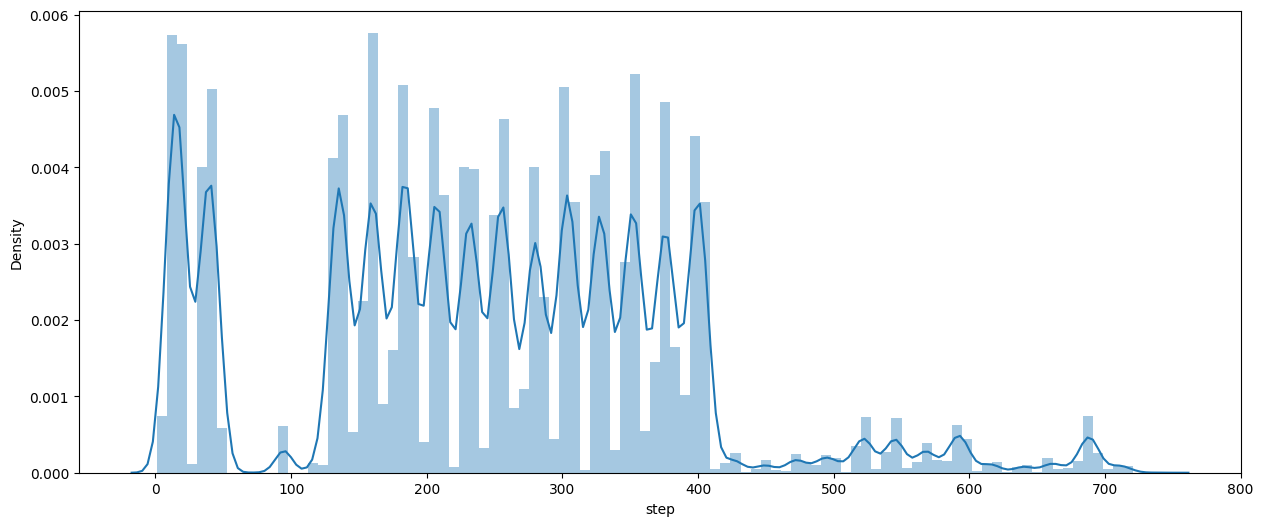

In [39]:
plt.figure(figsize=(15,6))
sns.distplot(df['step'],bins=100)

Text(0, 0.5, 'Fraud count by step')

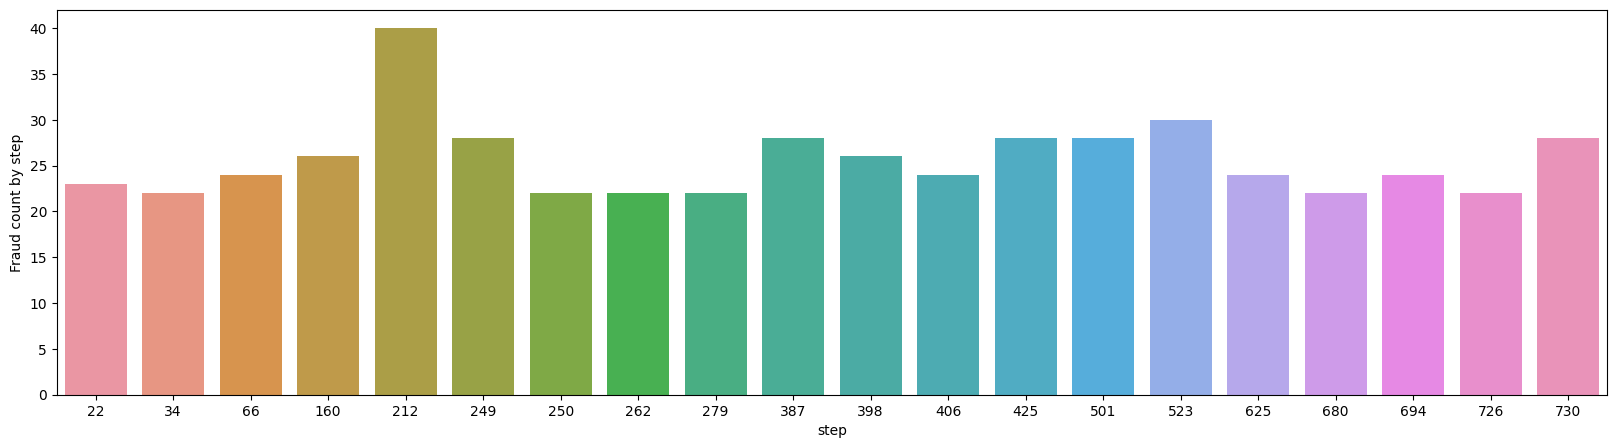

In [40]:
t=pd.DataFrame(df.groupby(by=df['step'])['isFraud'].sum())
t2=t.sort_values(by='isFraud', ascending=False).head(20)
t2 = t2.rename_axis('step').reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=t2,x='step', y='isFraud',)
plt.ylabel('Fraud count by step')

<Axes: xlabel='type', ylabel='count'>

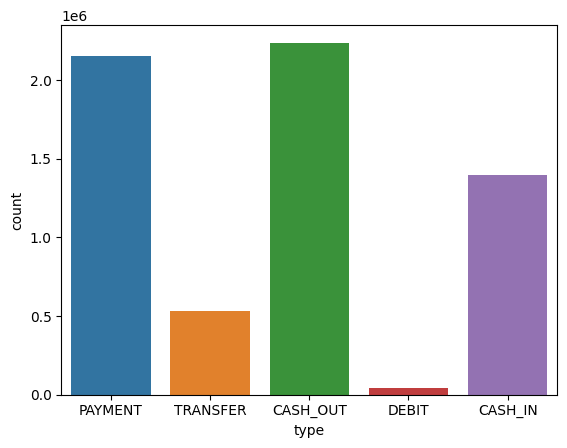

In [41]:
sns.countplot(x='type',data=df)

<Axes: xlabel='type', ylabel='amount'>

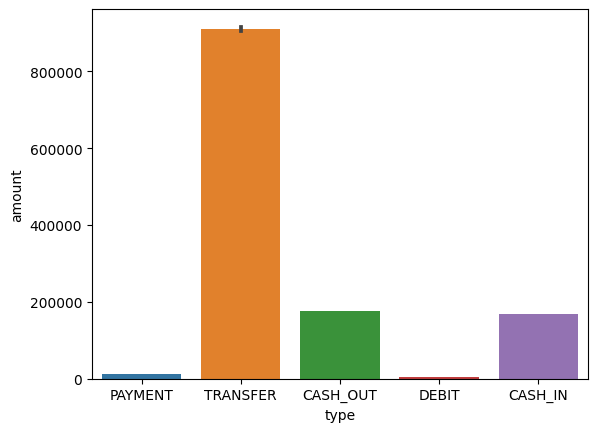

In [42]:
sns.barplot(x='type',y='amount',data = df)

In [43]:
type_counts = df["type"].value_counts()

In [44]:
types = type_counts.index
counts = type_counts.values

# Create a pie chart to show the distribution of transaction types
fig = px.pie(
    names=types,
    values=counts,
    hole=0.5,
    title="Distribution of Transaction Types"
)

# Show the chart
fig.show()

<ipython-input-45-369ef5a12989>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='amount', ylabel='Density'>

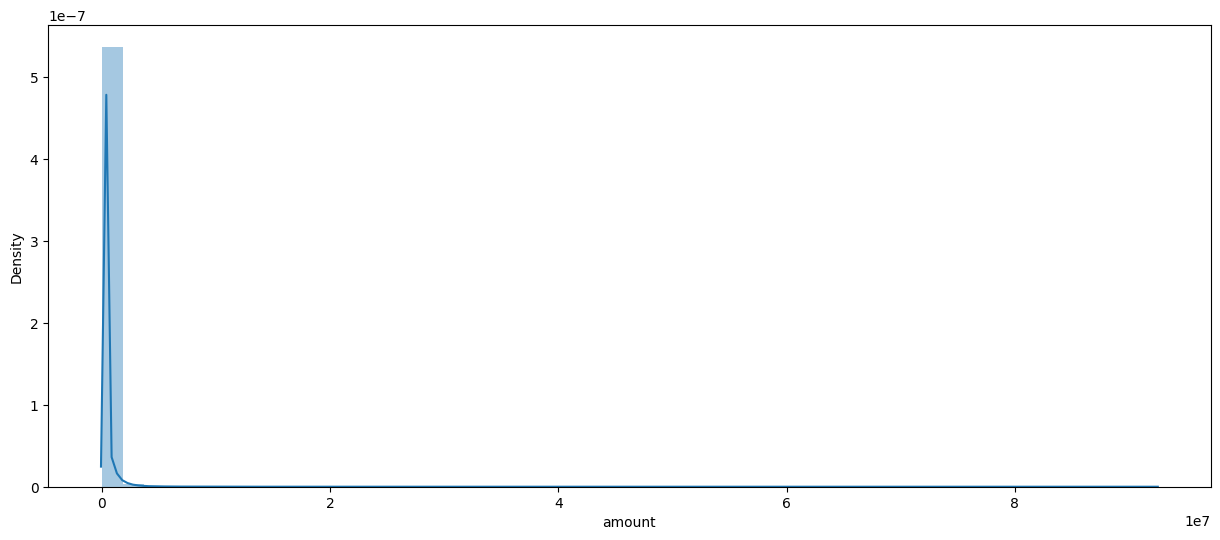

In [45]:
plt.figure(figsize=(15,6))
sns.distplot(df['amount'])

Text(0.5, 1.0, 'Distribution of transaction amount')

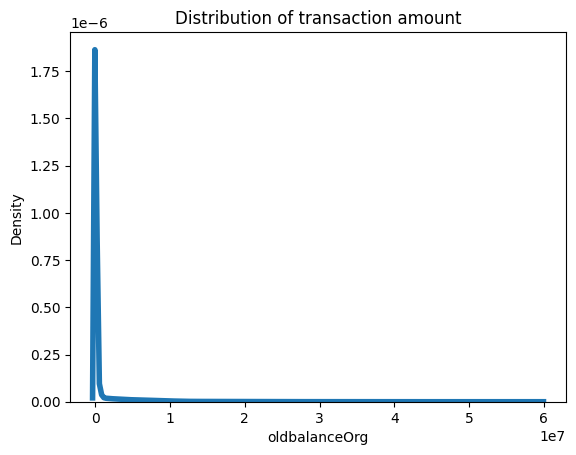

In [46]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

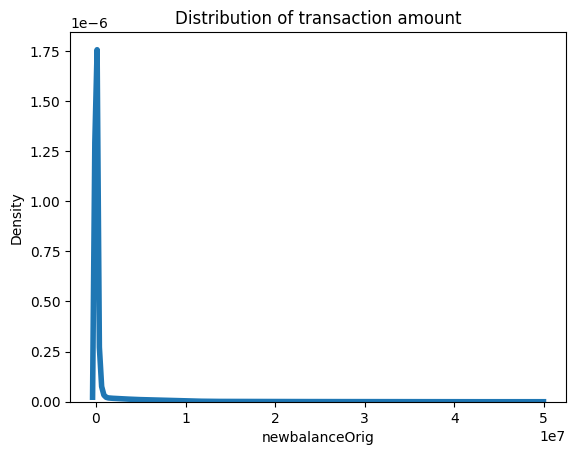

In [47]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

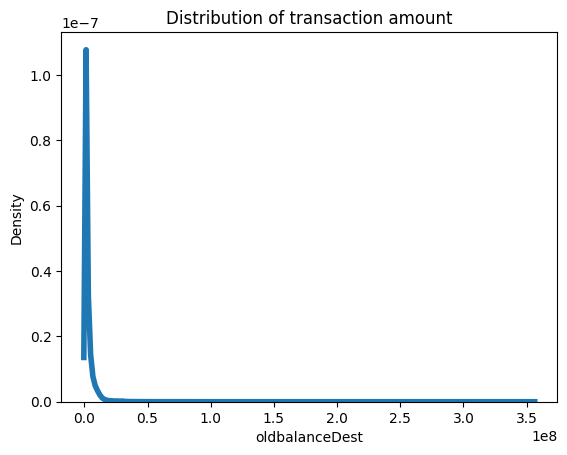

In [48]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

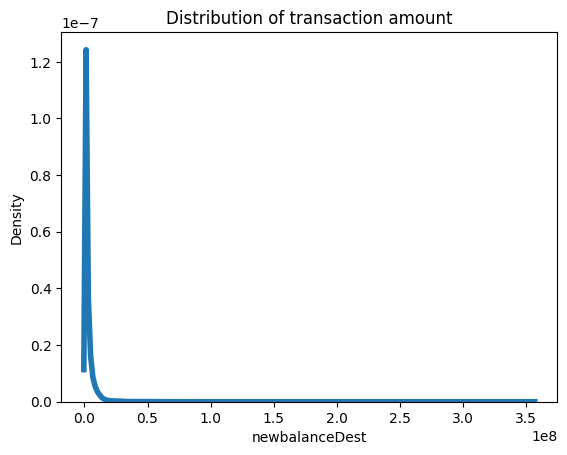

In [49]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

<Axes: xlabel='isFraud', ylabel='count'>

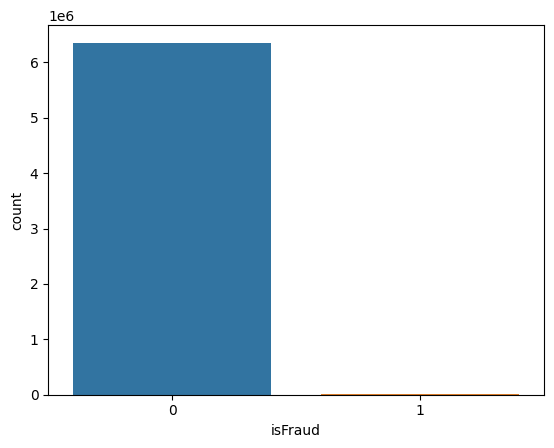

In [50]:
sns.countplot(x='isFraud',data=df)

In [51]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
] 

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


Text(0.5, 1.0, 'Distribution of transaction amount')

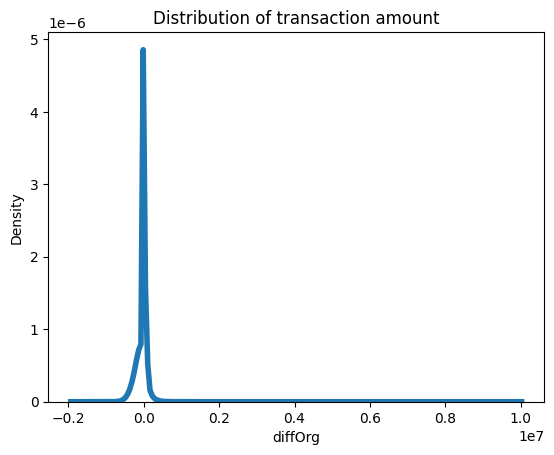

In [52]:
sns.kdeplot(df['diffOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

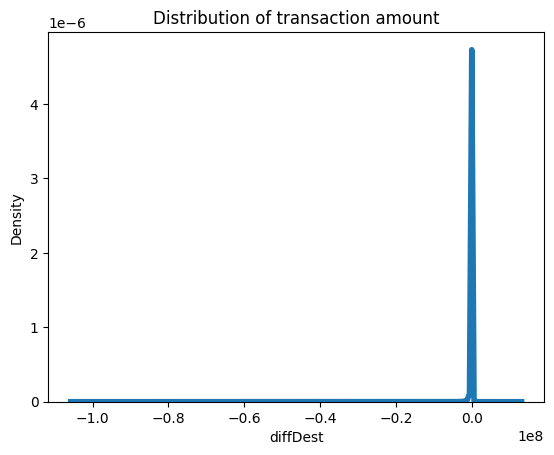

In [53]:
sns.kdeplot(df['diffDest'], linewidth=4)
plt.title('Distribution of transaction amount')

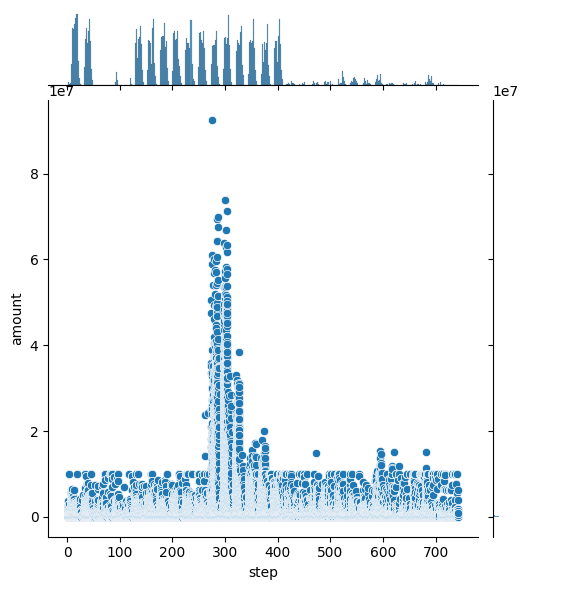

In [54]:
sns.jointplot(x='step',y='amount',data=df)

In [55]:
# Check duplicate values
df.duplicated().sum()

0

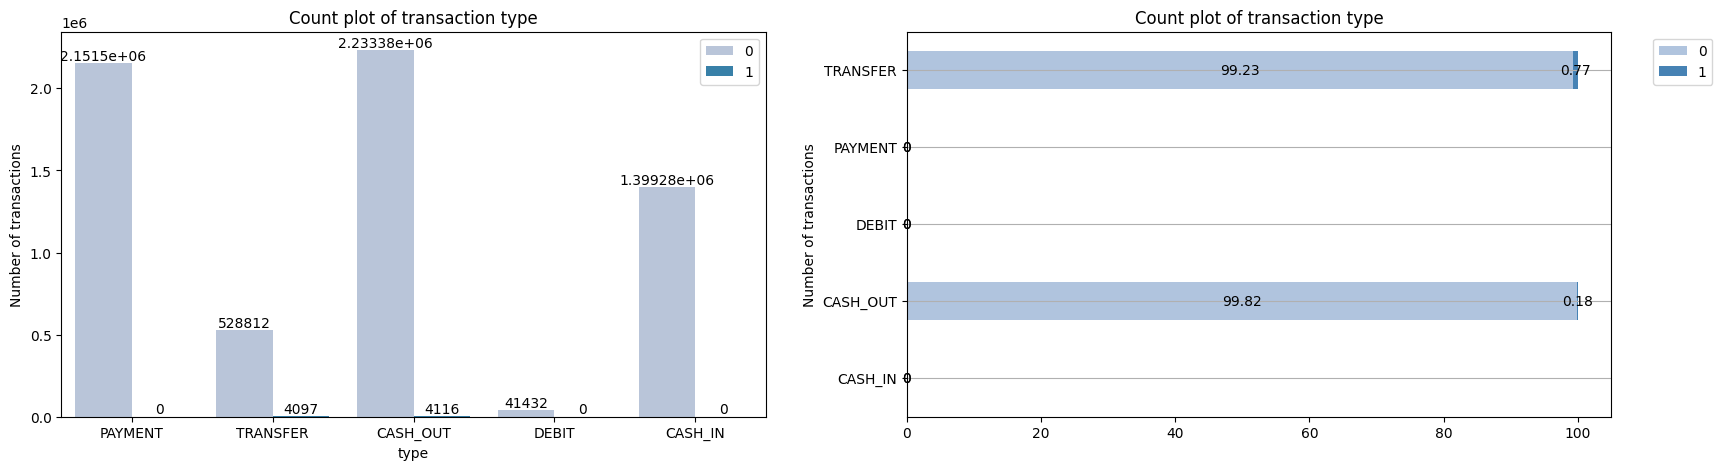

In [56]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Text(0, 0.5, 'Number of transactions')

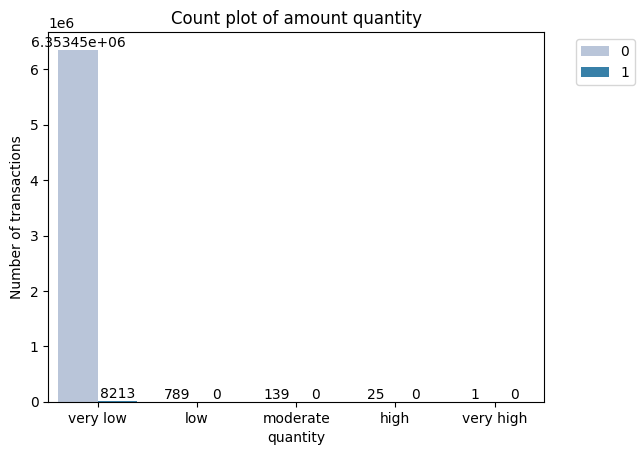

In [57]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

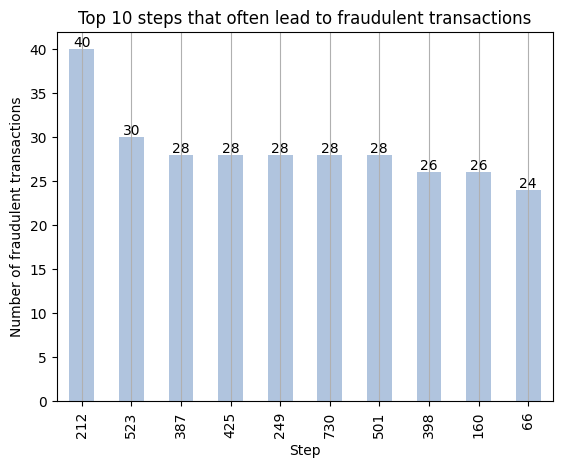

In [58]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

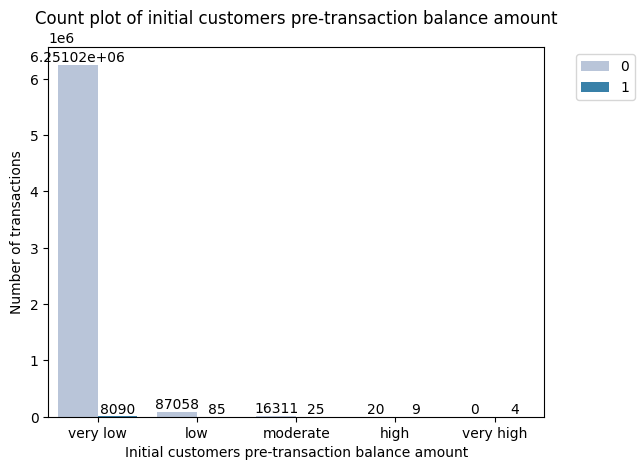

In [59]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

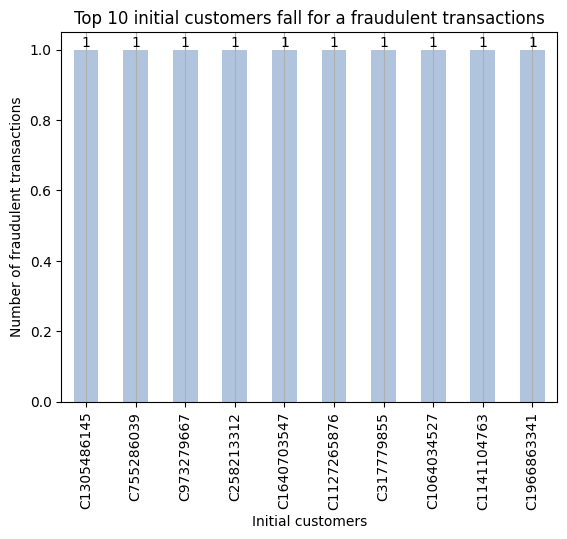

In [60]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

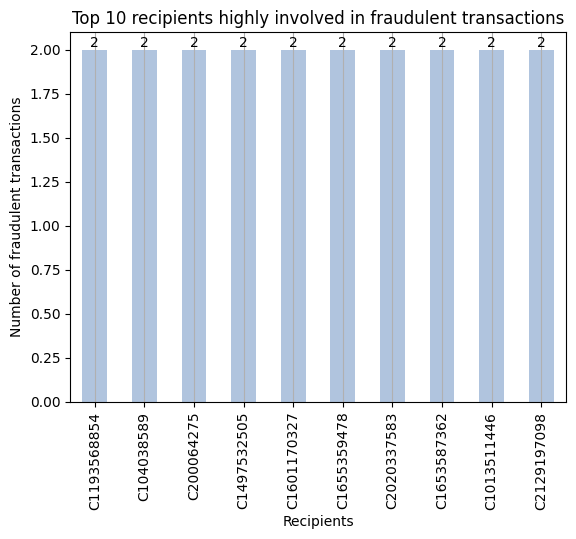

In [61]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Text(0.5, 0, 'Recipient pre-transaction balance amount')

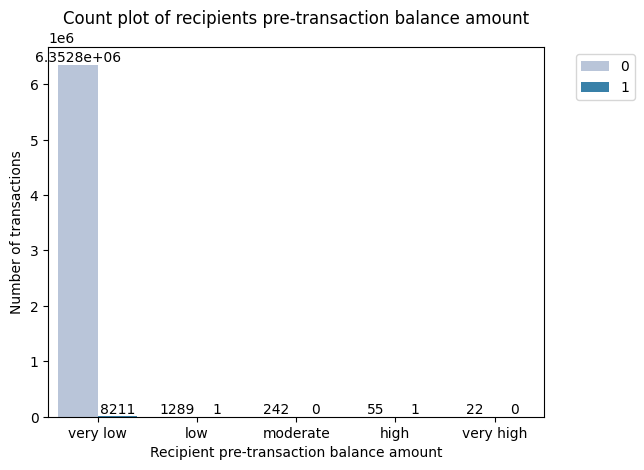

In [62]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

In [63]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffOrg,diffDest,quantity,oldbalanceOrg_amt,oldbalanceDest_amt
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,very low,very low,very low
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,very low,very low,very low
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,very low,very low,very low
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0,very low,very low,very low
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,very low,very low,very low


In [64]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace = True)

In [65]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffOrg,diffDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [66]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

Text(0.5, 1.0, 'Correlation')

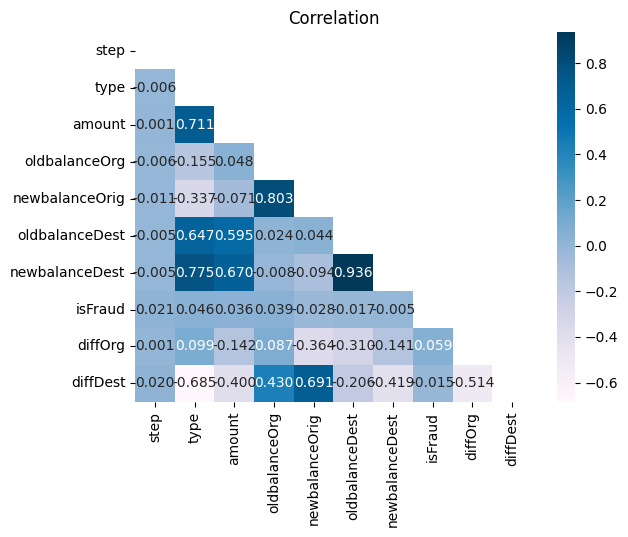

In [67]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

In [68]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffOrg,diffDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [69]:
df.drop(['diffOrg', 'diffDest'], axis=1, inplace = True)

In [70]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


<Axes: >

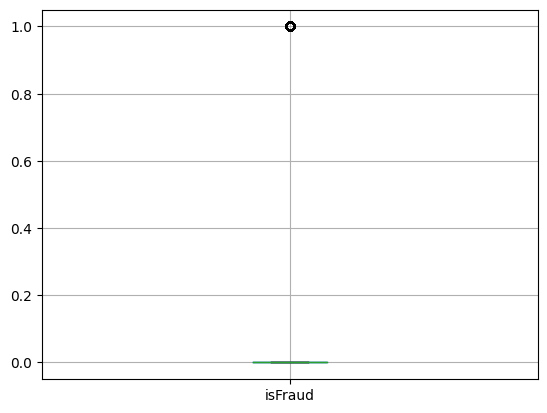

In [71]:
df.boxplot('isFraud') 

<Axes: >

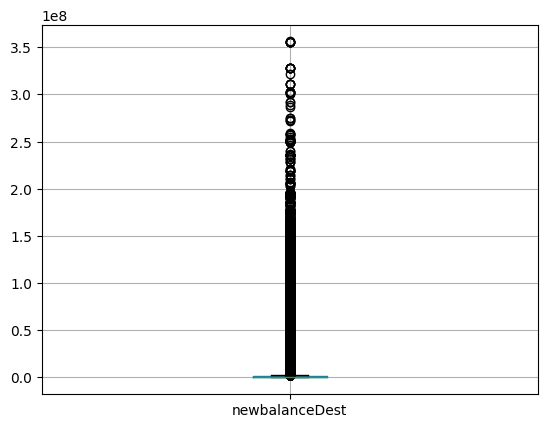

In [72]:
df.boxplot('newbalanceDest') 

<Axes: >

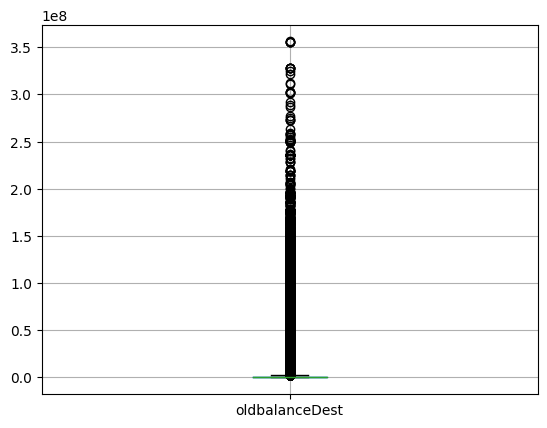

In [73]:
df.boxplot('oldbalanceDest') 

<Axes: >

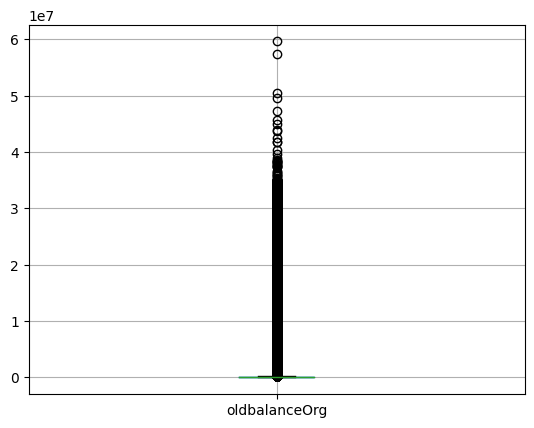

In [74]:
df.boxplot('oldbalanceOrg') 

<Axes: >

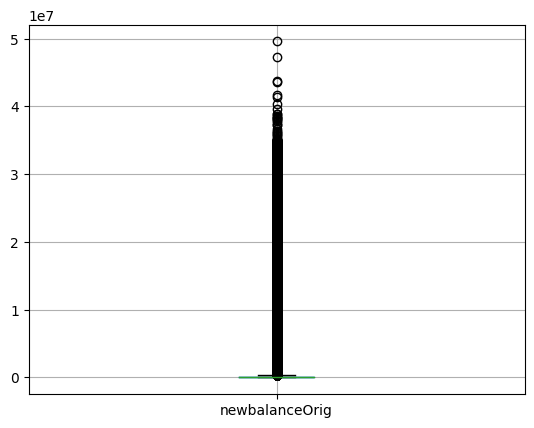

In [75]:
df.boxplot('newbalanceOrig') 

<Axes: >

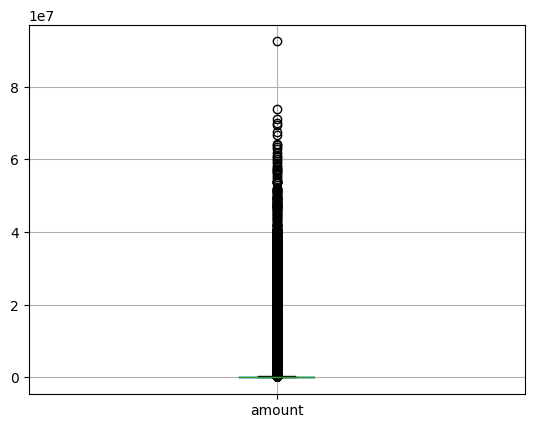

In [76]:
df.boxplot('amount') 

<Axes: >

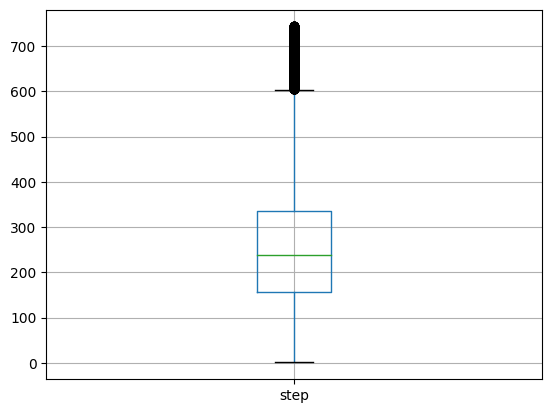

In [77]:
df.boxplot('step') 

<Axes: >

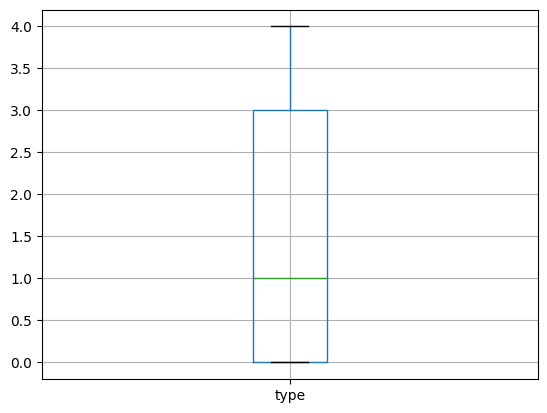

In [78]:
df.boxplot('type') 

In [79]:
x = df.drop("isFraud", axis=1)
y = df[["isFraud"]]

In [80]:
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0


In [81]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [83]:
def plot_ROC_curve(y_test, prob):
    #Takes actual and predicted probablities as a input and plot receiver operating chracteritics 
    fpr, tpr, threshold = roc_curve(y_test, prob)
    plt.title("ROC curve plot")
    plt.plot(fpr, tpr, 'b', label="curve measure")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def model_evaluation(test, pred):
    print("Model accuracy:\n", accuracy_score(test, pred))
    print()
    print("Confusion metrix:\n", confusion_matrix(test, pred))
    print()
    print("Classification report:\n", classification_report(test,pred))


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model accuracy:
 0.9982208587028614

Confusion metrix:
 [[634786    659]
 [   473    344]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.34      0.42      0.38       817

    accuracy                           1.00    636262
   macro avg       0.67      0.71      0.69    636262
weighted avg       1.00      1.00      1.00    636262



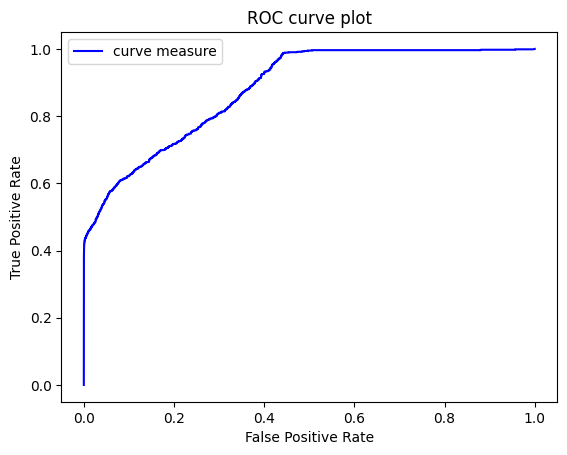

In [84]:
Model = LogisticRegression()
Model.fit(x_train, y_train)

y_pred = Model.predict(x_test)
predec_prob = Model.predict_proba(x_test)[:,1]

model_evaluation(y_test, y_pred)
plot_ROC_curve(y_test, predec_prob)

Model accuracy:
 0.9997249560715554

Confusion metrix:
 [[635369     76]
 [    99    718]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.90      0.88      0.89       817

    accuracy                           1.00    636262
   macro avg       0.95      0.94      0.95    636262
weighted avg       1.00      1.00      1.00    636262



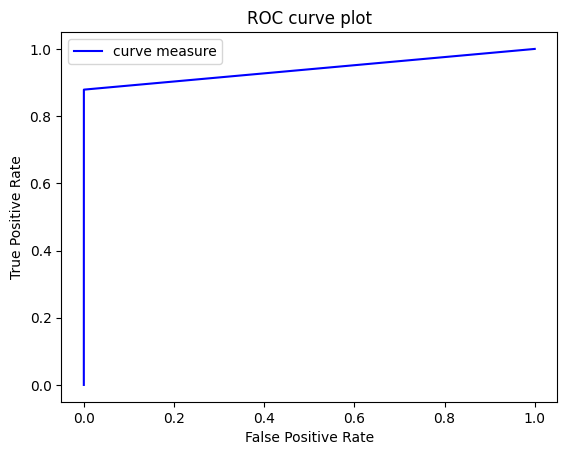

In [85]:
Model = DecisionTreeClassifier()
Model.fit(x_train, y_train)

y_pred = Model.predict(x_test)
predec_prob = Model.predict_proba(x_test)[:,1]

model_evaluation(y_test, y_pred)
plot_ROC_curve(y_test, predec_prob)

Model accuracy:
 0.9994341953471997

Confusion metrix:
 [[635384     61]
 [   299    518]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.89      0.63      0.74       817

    accuracy                           1.00    636262
   macro avg       0.95      0.82      0.87    636262
weighted avg       1.00      1.00      1.00    636262



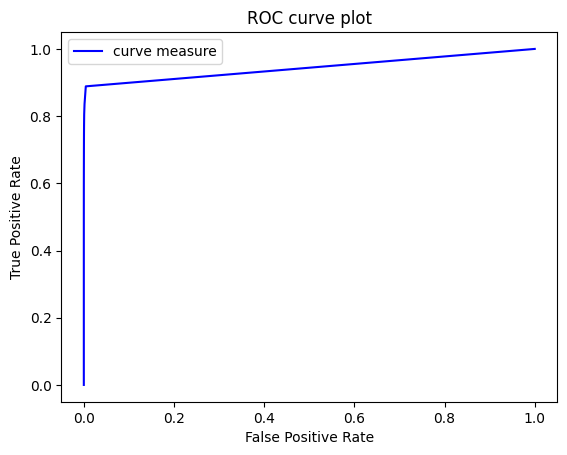

In [86]:
#Initializing KNeighbors object
Model=KNeighborsClassifier(n_neighbors=20)

#Training the train data
Model.fit(x_train, np.ravel(y_train))

#Getting prediction value
y_pred = Model.predict(x_test)
#Calculating the probablity 
predec_prob = Model.predict_proba(x_test)[:,1]

#Calling model evaluation function
model_evaluation(y_test, y_pred)

#Visualizing the roc
plot_ROC_curve(y_test, predec_prob)

Model accuracy:
 0.9995426412389865

Confusion metrix:
 [[635317    128]
 [   163    654]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.84      0.80      0.82       817

    accuracy                           1.00    636262
   macro avg       0.92      0.90      0.91    636262
weighted avg       1.00      1.00      1.00    636262



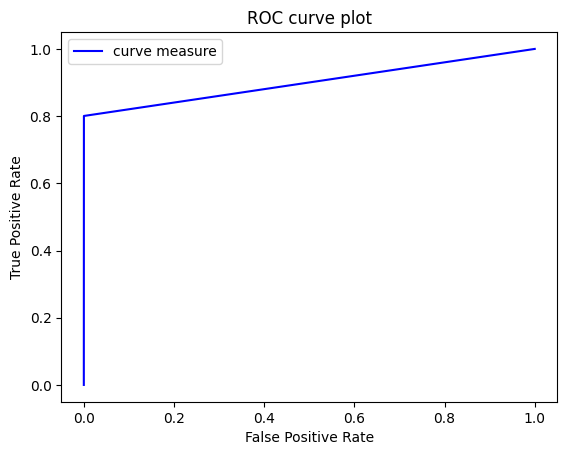

In [90]:
#Creating RFC object
Model = RandomForestClassifier(n_estimators=1)
#Training the model
Model.fit(x_train, np.ravel(y_train))
#predict the model
y_pred = Model.predict(x_test)
predec_prob = Model.predict_proba(x_test)[:,1]
#Model performance
model_evaluation(y_test, y_pred)
#Plotting the curve
plot_ROC_curve(y_test, predec_prob)

In [92]:
df['isFraud'].sum()/len(df)

0.001290820448180152